# Telecom Churn Prediction

In this project, we are tasked with developing a machine learning model that can predict, with a high AUC-ROC, whether a client will churn. Our goal is to develop a model that provides an AUC-ROC score of at least .88. In the first portion of this project, we will perform exploratory data analysis and data preprocessing; regarding the latter, we will ensure that our data is suitably formatted to be used in classification and we will remove unnecessary features while fomulating new ones. We will then train and test a series of classification models to find the one that performs best. In doing so, we will first examine various singular gradient-boosting models; we will then build ensemble models using blending and stackign techniques. Finally, we will identify and describe our best performing model, which will be submitted in partial fulfilment of the criteria for this project.

**Project Results Summary**: After preprocessing our data and training and testing various models, we found that our stacked meta-model provided the highest AUC-ROC score of all models trained and tested for this project. Our goal was to build a model with an AUC-ROC score of greater than .88; as it turns out, our best model's score (i.e., the Stacked Meta-Model) was approximately .963. We believe that this model provides an adequate balance between maximizing true positives and negatives while minimizing false positives and negatives (which is reflected in the high Matthew's Correlation Coefficient score of approximately .777). 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries-and-Read-Data" data-toc-modified-id="Import-Libraries-and-Read-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries and Read Data</a></span><ul class="toc-item"><li><span><a href="#Import-Relevant-Libraries" data-toc-modified-id="Import-Relevant-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Relevant Libraries</a></span></li><li><span><a href="#Create-Script-to-Skip-Cells" data-toc-modified-id="Create-Script-to-Skip-Cells-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Create Script to Skip Cells</a></span></li><li><span><a href="#Download-and-Unpack-Data" data-toc-modified-id="Download-and-Unpack-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Download and Unpack Data</a></span></li><li><span><a href="#Read-Files-to-DataFrames" data-toc-modified-id="Read-Files-to-DataFrames-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Read Files to DataFrames</a></span></li></ul></li><li><span><a href="#Preprocess-the-Data" data-toc-modified-id="Preprocess-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocess the Data</a></span><ul class="toc-item"><li><span><a href="#Check-for-Similar-Columns-in-All-DataFrames-&amp;-Merge-Data" data-toc-modified-id="Check-for-Similar-Columns-in-All-DataFrames-&amp;-Merge-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Check for Similar Columns in All DataFrames &amp; Merge Data</a></span></li><li><span><a href="#Examine-New-DataFrame-Information" data-toc-modified-id="Examine-New-DataFrame-Information-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Examine New DataFrame Information</a></span></li><li><span><a href="#Fill-in-NaNs" data-toc-modified-id="Fill-in-NaNs-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fill in NaNs</a></span></li><li><span><a href="#Change-Datatype-of-Various-Features" data-toc-modified-id="Change-Datatype-of-Various-Features-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Change Datatype of Various Features</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Data-Preprocessing-Summary" data-toc-modified-id="Data-Preprocessing-Summary-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Data Preprocessing Summary</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Examine-Target-Distribution" data-toc-modified-id="Examine-Target-Distribution-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Examine Target Distribution</a></span></li><li><span><a href="#Examine-Correlations" data-toc-modified-id="Examine-Correlations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Examine Correlations</a></span></li><li><span><a href="#Examine-Dispersion-of-Continuous-Variables" data-toc-modified-id="Examine-Dispersion-of-Continuous-Variables-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Examine Dispersion of Continuous Variables</a></span></li><li><span><a href="#Test-Significance-of-Mean-Differences" data-toc-modified-id="Test-Significance-of-Mean-Differences-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Test Significance of Mean Differences</a></span></li><li><span><a href="#Exploratory-Data-Analysis-Summary" data-toc-modified-id="Exploratory-Data-Analysis-Summary-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Exploratory Data Analysis Summary</a></span></li></ul></li><li><span><a href="#Model-Development" data-toc-modified-id="Model-Development-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Development</a></span><ul class="toc-item"><li><span><a href="#Split-Dataset" data-toc-modified-id="Split-Dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Split Dataset</a></span></li><li><span><a href="#Create-Scoring-Function-for-Models" data-toc-modified-id="Create-Scoring-Function-for-Models-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Create Scoring Function for Models</a></span></li><li><span><a href="#Find-Optimal-Hyperparameters-for-Base-Models-with-Bayesian-Optimization" data-toc-modified-id="Find-Optimal-Hyperparameters-for-Base-Models-with-Bayesian-Optimization-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Find Optimal Hyperparameters for Base Models with Bayesian Optimization</a></span><ul class="toc-item"><li><span><a href="#Create-Helper-Function" data-toc-modified-id="Create-Helper-Function-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Create Helper Function</a></span></li><li><span><a href="#XGBClassifier-Optimization" data-toc-modified-id="XGBClassifier-Optimization-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>XGBClassifier Optimization</a></span></li><li><span><a href="#CatBoostClassifier-Optimization" data-toc-modified-id="CatBoostClassifier-Optimization-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>CatBoostClassifier Optimization</a></span></li><li><span><a href="#LGBMClassifier-Optimization" data-toc-modified-id="LGBMClassifier-Optimization-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>LGBMClassifier Optimization</a></span></li><li><span><a href="#Obtain-Scores-for-Base-Models" data-toc-modified-id="Obtain-Scores-for-Base-Models-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Obtain Scores for Base Models</a></span></li></ul></li><li><span><a href="#Model-Blending" data-toc-modified-id="Model-Blending-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Model Blending</a></span><ul class="toc-item"><li><span><a href="#Create-Function-for-Model-Fitting" data-toc-modified-id="Create-Function-for-Model-Fitting-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Create Function for Model Fitting</a></span></li><li><span><a href="#Create-Function-for-Meta-Model-Testing" data-toc-modified-id="Create-Function-for-Meta-Model-Testing-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Create Function for Meta-Model Testing</a></span></li><li><span><a href="#Split-Training-Data-into-Train-and-Validation-Sets" data-toc-modified-id="Split-Training-Data-into-Train-and-Validation-Sets-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Split Training Data into Train and Validation Sets</a></span></li><li><span><a href="#Train-Meta-Model" data-toc-modified-id="Train-Meta-Model-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Train Meta-Model</a></span></li><li><span><a href="#Test-Meta-Model" data-toc-modified-id="Test-Meta-Model-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>Test Meta-Model</a></span></li><li><span><a href="#Model-Blending-Summary" data-toc-modified-id="Model-Blending-Summary-4.4.6"><span class="toc-item-num">4.4.6&nbsp;&nbsp;</span>Model Blending Summary</a></span></li></ul></li><li><span><a href="#Model-Stacking" data-toc-modified-id="Model-Stacking-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Model Stacking</a></span><ul class="toc-item"><li><span><a href="#Stacking-with-Sklearn's-StackingClassifier" data-toc-modified-id="Stacking-with-Sklearn's-StackingClassifier-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Stacking with Sklearn's StackingClassifier</a></span></li><li><span><a href="#Create-Function-to-Obtain-Out-of-Fold-Predictions" data-toc-modified-id="Create-Function-to-Obtain-Out-of-Fold-Predictions-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Create Function to Obtain Out-of-Fold Predictions</a></span></li><li><span><a href="#Create-Prediction-DataFrames" data-toc-modified-id="Create-Prediction-DataFrames-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>Create Prediction DataFrames</a></span></li><li><span><a href="#Obtain-Predictions-for-Base-Models" data-toc-modified-id="Obtain-Predictions-for-Base-Models-4.5.4"><span class="toc-item-num">4.5.4&nbsp;&nbsp;</span>Obtain Predictions for Base Models</a></span></li><li><span><a href="#Train-and-Test-Stacking-Meta-Model" data-toc-modified-id="Train-and-Test-Stacking-Meta-Model-4.5.5"><span class="toc-item-num">4.5.5&nbsp;&nbsp;</span>Train and Test Stacking Meta-Model</a></span></li><li><span><a href="#Model-Stacking-Summary" data-toc-modified-id="Model-Stacking-Summary-4.5.6"><span class="toc-item-num">4.5.6&nbsp;&nbsp;</span>Model Stacking Summary</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Import Libraries and Read Data

### Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tqdm import tqdm
from scipy import stats as st

import optuna
import xgboost as xgb
from catboost import CatBoostClassifier, Pool
import lightgbm as lgbm

from sklearn.metrics import roc_auc_score as ros
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier

### Create Script to Skip Cells

In [2]:
%%writefile skip_kernel_extension.py

#Create's script to skip cells instead of running.
#This is to preserve code while saving time.
def skip(line, cell=None):
    '''Skips execution of the current line/cell if line evaluates to True.'''
    if eval(line):
        return

    get_ipython().ex(cell)

def load_ipython_extension(shell):
    '''Registers the skip magic when the extension loads.'''
    shell.register_magic_function(skip, 'line_cell')

def unload_ipython_extension(shell):
    '''Unregisters the skip magic when the extension unloads.'''
    del shell.magics_manager.magics['cell']['skip']

Overwriting skip_kernel_extension.py


In [3]:
#Load script for skipping certain cells.
%load_ext skip_kernel_extension

### Download and Unpack Data

In [4]:
try:
    #Display files in directory if they exist.
    file_list=os.listdir(r"df_data/final_provider/")
    print (file_list)

except:
    #Download file from Google Drive.
    !gdown https://drive.google.com/uc?id=1iYdXbrDOGftGB69qUthPmwJNXwP7KB9r
    !unzip final_provider.zip -d ./df_data/
    
    #Display files in directory.
    file_list=os.listdir(r"df_data/final_provider/")
    print (file_list)

['internet.csv', 'phone.csv', 'contract.csv', 'personal.csv']


### Read Files to DataFrames

In [5]:
#Read files to DataFrame.
internet = pd.read_csv("df_data/final_provider/internet.csv")
phone = pd.read_csv("df_data/final_provider/phone.csv")
personal = pd.read_csv("df_data/final_provider/personal.csv")
contract = pd.read_csv("df_data/final_provider/contract.csv")

## Preprocess the Data

### Check for Similar Columns in All DataFrames & Merge Data

Ideally, we would like to merge DataFrames to make the data easier to work with; however, in order to do so, we must identify a column unique to all DataFrames on which to merge them. To determine whether we can merge our DataFrames, let us check whether there is feature that exists in all DataFrames.

In [6]:
#Use set intersection method to check for similar columns.
print(f'Similar Columns Across all DataFrames: {set.intersection(set(internet.columns), set(phone.columns), set(personal.columns), set(contract.columns))}')

Similar Columns Across all DataFrames: {'customerID'}


We can see that one feature exists in all DataFrames - that is, the 'customerID' feature. If all of our DataFrames are to be merged on this feature in such a way that data is not lost, the values of feature must exist in more than one DataFrame. To check whether this is the case, we will use the set.difference() method.

In [7]:
#Check if 'customerID' value exists in one DataFrame only.
print(f'Total Non-intersecting Customer IDs: {len(set.difference(set(internet["customerID"]), set(phone["customerID"]), set(personal["customerID"]), set(contract["customerID"])))}')

Total Non-intersecting Customer IDs: 0


2.1 Notes: We can see that there are no Customer IDs that exist only on one DataFrame and not at least one other. Because of this, we can infer that all of the DataFrames are interconnected. While some Customer ID's might not feature across all DataFrames, this is to be expected, as not every individual takes advantage of everything a telecommunications company offers, such as phone and internet. Because there are no non-intersecting customer IDs, we can merge all DataFrames together.

Our intuition is that all customers' information is contained in personal. If this is the case, we will use the customer IDs in this DataFrame as the merge keys. To test whether our intuition is correct, let us see if any of the customer IDs in the other DataFrames are missing from the personal DataFrame.


In [8]:
#Get list of IDs not in any other DataFrame.
print("Total Customer IDs Missing From Personal DataFrame: {}".format(len(set(personal["customerID"]).difference(set(internet["customerID"]),
                                                                          set(contract["customerID"]), set(phone["customerID"])))))

Total Customer IDs Missing From Personal DataFrame: 0


2.1 Notes Continued: Our intuition was correct. So that we preserve the information from all DataFrames, we will perform a left merge with the personal DataFrame, using the 'customerID' values as keys.

In [9]:
#Merge DataFrames on 'customerID' Column
df = (personal.merge(contract, how="left", on="customerID")
              .merge(phone, how="left", on="customerID")
              .merge(internet, how="left", on="customerID"))

### Examine New DataFrame Information

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


2.2 Notes: From the above information, we can see that there are missnig values in all columns after 'TotalCharges'. These columns completely comprise the 'internet' DataFrame (except for 'MultipleLines', which is from the phone DataFrame), which suggests that the NaNs in these columns are for those individuals who did not purchase a contract for internet. Given this information, we will fill these NaNs with 'No'. Rather than filling the NaNs with 0 at this point, we will fill them with 'No' as our target column, which is 'EndDate', has 'No' values for those who haven't churned.

As for the 'MultipleLines' column, which is from the 'phone' DataFrame, we believe that the NaNs represent individuals who either no longer have a phone contract, or those who have only internet and no phone. As such, we will also replace these missing values with 'No'.

Finally, we notice that most of the features are of the 'object' datatype. In a subsequent subsection we will change the datatypes for most of these features to a numeric type.

### Fill in NaNs

In [11]:
#Fills NaNs in all columns with 'No'
df = df.fillna('No')

In [12]:
#Get new NaN count.
print(f'Total NaNs in DataFrame: {df.isnull().sum().sum()}')

Total NaNs in DataFrame: 0


2.3 Notes: As we can see, all of the identified NaNs have been filled. Let us now move on to changing the datatypes for various features.

### Change Datatype of Various Features

In subsection 2.2 we noted that many features are comprised of binary values - that is, 'Yes' and 'No' values. In order to change the datatype for these faetures, we will replace the 'No' values with 0 and the 'Yes' values with 1.

In [13]:
#Replace 'No' and 'Yes' with 0 and 1, respectively, in binary-value columns.
for col in df.columns:
    if sorted(df[col].unique()) == ['No', 'Yes']:
        df[col] = df[col].replace({'No':0, 'Yes':1})

2.4 Notes: As mentioned, our target column is 'EndDate'. In this column, 'No' values mean a client hasn't ended their contract, while dates mark the time at which the client's conract ends. Given the specifications of this project, we are trying to build a classification model. To allow for classification, we need to ensure that the 'EndDate' column has binary values. To do this, we will replace every date value with 'Yes'. Next, we will replace those values with 0s and 1s, respectively.

In [14]:
#Categorize values in 'EndDate' column.
df['EndDate'] = df['EndDate'].where(df['EndDate'] == 'No', 'Yes')
df['EndDate'] = df['EndDate'].replace({'No':0, 'Yes':1})

2.4 Notes Continued: Now that we've changed the datatypes of binary features with 'No'/'Yes' values, as well as turned our target into a binary feature, let us examine the remaining features to understand whether their datatypes should be changed and, if so, the best method to use. To start, we will obtain a count of unique values for each feature, as well as their current datatype.

In [15]:
#Print total of unique values and datatype for each feature.
unique_count = pd.DataFrame(df.nunique(), columns=['count'])
unique_count['object'] = df.dtypes
print(unique_count)

                  count   object
customerID         7043   object
gender                2   object
SeniorCitizen         2    int64
Partner               2    int64
Dependents            2    int64
BeginDate            77   object
EndDate               2    int64
Type                  3   object
PaperlessBilling      2    int64
PaymentMethod         4   object
MonthlyCharges     1585  float64
TotalCharges       6531   object
MultipleLines         2    int64
InternetService       3   object
OnlineSecurity        2    int64
OnlineBackup          2    int64
DeviceProtection      2    int64
TechSupport           2    int64
StreamingTV           2    int64
StreamingMovies       2    int64


2.4 Notes Continued: We can see that the 'gender' feature is the only one remaining that is binary but still of the 'object' datatype. We will simply change this to 'int64' by setting 'Male' to 0 and 'Female' to 1.

In [16]:
#Change 'Female' to 1 and 'Male' to 0 in 'gender' column.
df['gender'] = df['gender'].replace({'Male':0, 'Female':1})

2.4 Notes continued: Having changed the dataypes for all binary categorical variables, we are left with only six features of the 'object' datatype. Of these, not all will be used to train a future model. For example, the 'customerID' features does not provide the model with any useful information; as such, we will remove it from the DataFrame. Similarly, we will remove the 'BeginDate' feature, though only once we've created an additional feature based on the length of time an individual's contract has been active. 

That being said, based on the above count of unique values for each feature, we can see that there are three polyvalent features with low cardinality - those are the 'PaymentMethod', 'InternetService', and 'Type' features. Since these are not overtly ordinal, we have decided to change their datatypes and values using frequency encoding. 

In [17]:
#Frequency encode 'PaymentMethod', 'InternetService', and 'Type' features.
for col in ['PaymentMethod', 'InternetService', 'Type']:
    group = df.groupby(col).size() / len(df[col])
    df[col] = df[col].map(group)

2.4 Notes Continued: With the low-cardinality polyvariate features frequency encoded, the only feature we have left to change the datatype of, except for those mentioned which we plan on removing, is the 'TotalCharges' feature. Currently, 'TotalCharges' is of the 'object' datatype, when it should apparently be numeric. Let us quickly make this change.

In [18]:
#Change datatype for 'TotalCharges' to numeric.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [19]:
#Check for NaNs in 'TotalCharges' feature.
total_nulls_charges = df['TotalCharges'].isnull().sum()

#If there are NaNs, print count and DataFrame sample.
if total_nulls_charges > 0:
    print(f'Total NaNs in TotalCharges: {total_nulls_charges}\n')
    display(df.loc[df.TotalCharges.isnull()].head())

Total NaNs in TotalCharges: 11



,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
488,4472-LVYGI,1,0,1,1,2020-02-01,0,0.240664,1,0.219225,52.55,NaN,0,0.343746,1,0,1,1,1,0
753,3115-CZMZD,0,0,0,1,2020-02-01,0,0.240664,0,0.228880,20.25,NaN,0,0.216669,0,0,0,0,0,0
936,5709-LVOEQ,1,0,1,1,2020-02-01,0,0.240664,0,0.228880,80.85,NaN,0,0.343746,1,1,1,0,1,1
1082,4367-NUYAO,0,0,1,1,2020-02-01,0,0.240664,0,0.228880,25.75,NaN,1,0.216669,0,0,0,0,0,0
1340,1371-DWPAZ,1,0,1,1,2020-02-01,0,0.240664,0,0.216101,56.05,NaN,0,0.343746,1,1,1,1,1,0


2.4 Notes Continued: Since we found NaNs in 'TotalCharges' after changing the feature's datatype, we printed a subsample of the DataFrame in which the NaNs exist. It appears that all the NaNs occur where the date is '2020-02-01'. Our suspicion is that the NaNs are the result of an individual having newly purchased a plan, as a result of which they haven't had to make their first payment yet. To see whether this is the case, we will have to change the 'BeginDate' feature's datatype to 'datetime' and find the most recent date contained in the DataFrame.

In [20]:
#Change 'BeginDate' to 'datetime' format.
df['BeginDate'] = pd.to_datetime(df['BeginDate'])

#Print most recent date in DataFrame.
print(f'Most Recent Date in DataFrame: {df["BeginDate"].sort_values(ascending=False).iloc[0]}')

Most Recent Date in DataFrame: 2020-02-01 00:00:00


2.4 Notes Continued: As we can see, the most recent date in the DataFrame is 2020-02-01. This appears to confirm our suspicion that the NaNs in 'TotalCharges' are for individuals who haven't had to make their first payment yet. That being the case, we will simply replace the NaNs with 0s.

In [21]:
#Fill NaNs in 'TotalCharges' with 0s.
df['TotalCharges'] = df['TotalCharges'].fillna(0)

2.4 Summary: In this section we changed the datatype of most 'object' features to numeric. For binary variables, we changed the valies to 0 and 1. For polyvariate, low-cardinality variables, we used frequency encoding, which changed their datatypes to 'float64'. We also changed the 'BeginDate' feature's datatype to 'datetime64' in order to determine how to best fill the NaNs in 'TotalCharges' once the feature datatype was switched from 'object' to 'float64'; we determined that the best method would be to fill in the missing values with 0, as the NaNs are all associated with observations where the 'BeginDate' value is the most recent date listed in the DataFrame. Having changed the datatypes of all relevant 'object' features, we will perform feature engineering the the subsequent subsection.

### Feature Engineering

Although we currently have 19 features to work with, we will not use the 'customerID' and 'BeginDate' features in building our model. Instead, we will remove these features and create new ones, one of which will be based on the 'BeginDate' values. Our plan is to create one feature that contains the number of days that a subject's contract has been active, one feature that lists the total number of months a subject's contract has been active, and one feature that contains the sum of services each user pays for.

In [22]:
#Create feature for days and months an account has been active, using most recent date as maximum value.
df['days'] = (pd.Timestamp('2020-02-01') - df['BeginDate']).dt.days
df['months'] = ((pd.Timestamp('2020-02-01') - df['BeginDate']) / np.timedelta64(1, 'M')).round(0).astype('int')

In [23]:
display(df.head())
display(df.InternetService.value_counts())
display(internet.InternetService.value_counts())

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,days,months
0,7590-VHVEG,1,0,1,0,2020-01-01,0,0.550192,1,0.335794,...,0,0.343746,0,1,0,0,0,0,31,1
1,5575-GNVDE,0,0,0,0,2017-04-01,0,0.209144,0,0.228880,...,0,0.343746,1,0,1,0,0,0,1036,34
2,3668-QPYBK,0,0,0,0,2019-10-01,1,0.550192,1,0.228880,...,0,0.343746,1,1,0,0,0,0,123,4
3,7795-CFOCW,0,0,0,0,2016-05-01,0,0.209144,0,0.219225,...,0,0.343746,1,0,1,1,0,0,1371,45
4,9237-HQITU,1,0,0,0,2019-09-01,1,0.550192,1,0.335794,...,0,0.439585,0,0,0,0,0,0,153,5


0.439585    3096
0.343746    2421
0.216669    1526
Name: InternetService, dtype: int64

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

In [24]:
#Service feature list
services = ['PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

#Create feature for total services used by each individual.
df['services'] = df[services].sum(axis=1)

In [25]:
#Delete unnecessary features from DataFrame.
df.drop(['customerID', 'BeginDate'], inplace=True, axis=1)

### Data Preprocessing Summary

In this subsection we created new features using the data contained in the DataFrame. Specifically, we created a features with values that relate to the number of days and months that an individual has had a contract with the telecommunications provider, using 2020-02-01 as the current date; we also created a feature that indicates the number of services used by each individual. Once those features were created, we dropped the 'BeginDate' and 'customerID' features from the DataFrame; it was necessary to remove the former to prevent any target leakage from occuring. In the following section, we will carry out some exploratory data analysis to see how our target feature relates to the independant variables.

## Exploratory Data Analysis

In this section we perform exploratory data analysis to understand how our target relates to the independent variables. To start, we will visualize the distribution of positive and negative values in our target feature. We will then examine the correlation of the independant variables with the dependant variable, as well as the distributions of values.

### Examine Target Distribution

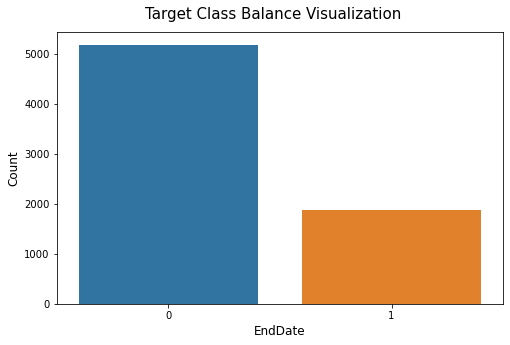

In [26]:
#Plot class values.
fig = plt.figure(figsize=(8, 5))
plt.suptitle("Target Class Balance Visualization", fontsize=15, y=.95)
sns.countplot(x='EndDate', data=df)
plt.xlabel("EndDate", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

3.1 Notes: From this simple countplot, we can clearly see that there is a moderate class imbalance, with there being more than twice as many individual who haven't churned represented in the dataset as those who have. In developing our model, we will account for this imbalance by tuning the relevant hyperparameter(s). If the model's AUC-ROC score is below .88, we will develop a new model that will be trained on a dataset that has been balanced using the SMOTE method. Of course, even though the AUC-ROC score will be the metric used to judge the suitability of our final model, we will also use other metrics to evaluate our model, including F1 score and Matthew's Correlation Coefficient.

### Examine Correlations

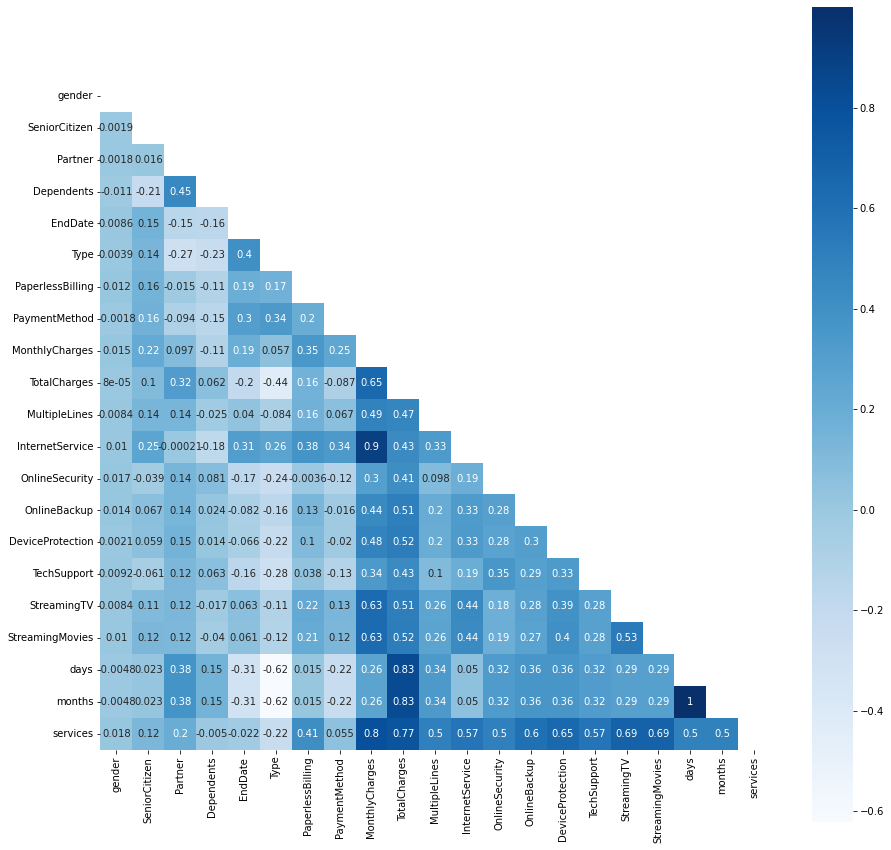

In [27]:
#Create correlation map.
corrmap = df.corr()
corr_mask = np.triu(corrmap)
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmap, square=True, mask=corr_mask, cmap="Blues", annot = True)
plt.show()

3.2 Notes: When plotting the above correlation heatmap, we removed half of the data points as they are simply duplicates. From what we can see, there are only a few features that are highly correlated with one another; in this instance, we take highly correlated to mean that the p value is greater than .6 or less than -.6. While some features are highly correlated with one another, it's important to note that no features are highly correlated with our dependant variable (i.e., 'EndDate'). That being said, the following features are highly correlated with one another:

* TotalCharges and MonthlyCharges (.65)
* InternetService and MonthlyCharges (.9)
* StreamingTV and MonthlyCharges (.63)
* StreamingMovies and MonthlyCharges (.63)
* Days and TotalCharges (.83)
* Days and Type (-.62)
* Months and Type (-.62)
* Months and TotalCharges (.83)
* Months and Days (1)
* Services and MonthlyCharges (.8)
* Services and TotalCharges (.77)
* Services and DeviceProtection(.65)
* Services and StreamingTV (.69)
* Services and StreamingMovies (.69)

The correlations here are quite intuitive, as one would assume, for example, that those with more contracted services would have higher monthly costs. One would also assume that the longer a person's contract was open, the higher their charges would be. Given the multicollinearity between these features, one might chose to drop one of each correlated feature from the DataFrame to reduce computational costs; however, given how few observations and features we have (i.e., 7043 and 20, respectively), we don't believe that the computational costs associated with keeping these features in the DataFrame would be overly burdensome. As such, we will most of these features. 

There is one feature, however, that we will remove from our DataFrame - that is, the 'months' feature. As we can see from the heatmap, the 'months' and 'days' features are identially correlated with all other features in the DataFrame. Because of this, 'months' would not add any additional useful information to our model.

In [28]:
#Remove 'months' from DataFrame.
df = df.drop('months', axis=1)

### Examine Dispersion of Continuous Variables

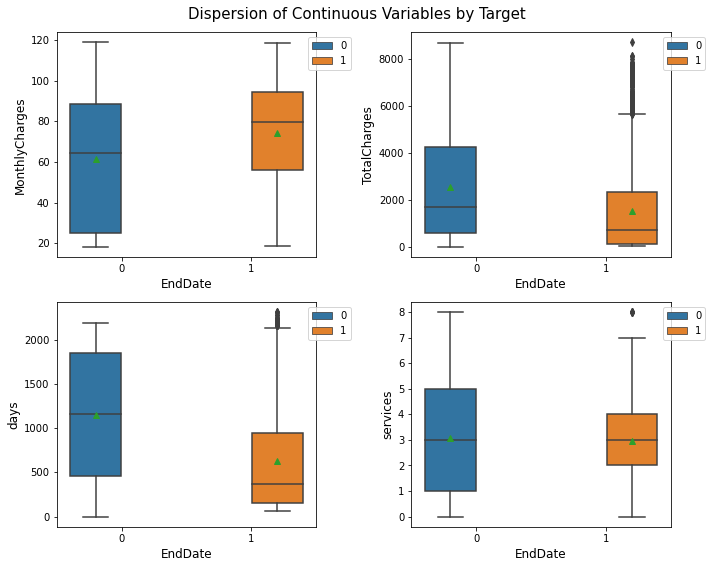

In [29]:
#Create list of variables to examine.
cont_vars = ['MonthlyCharges', 'TotalCharges', 'days', 'services']

#Create boxplots.
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
plt.suptitle('Dispersion of Continuous Variables by Target', fontsize=15)

for col, ax in zip(cont_vars, axs):
    sns.boxplot(x='EndDate', y=col, hue='EndDate', data=df, ax=ax, showmeans=True)
    ax.set_xlabel('EndDate', fontsize=12)
    ax.set_ylabel(col, fontsize=12)
    ax.set_xticks([0, 1])
    ax.legend(bbox_to_anchor=(.95, 1), loc='upper left')

plt.tight_layout()
plt.show()

3.3 Notes: From the above boxplots, we can see that the median contract length for individuals who have churned is much lower than the median length for individuals who haven't. And while those who have churned and those who haven't appear to use a similar number of services, those who have churned have higher median monthly charges than those who haven't churned. Perhaps the latter is due to those who haven't churned having longer contract lengths and being 'grandfathered' in with lower monthly service charges. 

In addition to showing median values, our boxplots show mean values (the green triangles). We can clearly see that those who have churned have a higher mean monthly charge value than those who haven't churned, but lower mean contract lenghts and total charges. Accordingly, one might assume that those with short contract lengths and high monthly charges are more likely to churn than those with longer contract lengths and fewer charges. While this may be a reasonable assumption based no the above boxplots, they must be statistically tested. As such, in the following subsection we will run two two-sample independent t-tests to determine whether the difference in means between the groups is significant.

One more point worth noting is that there are a few outliers in the 'TotalCharges', 'services', and 'days' plots. Although some may decide to drop the rows containing thee outliers, we believe that it is worth first training and testing a model based on the entire dataset, since there appear to only be few outliers and they may represent important information. If we find that our later model performs poorly, then we will drop the outliers from our dataset.

### Test Significance of Mean Differences

In this subsection we will be testing two null hypotheses; the first one concerns the 'days' feature, while the second concerns the 'MonthlyCharges' feature. We can formulate our null and alternative hypotheses as follows:

**Contract Lengths Test**
* Null = There is no difference in mean contract lengths for users who have churned versus users who haven't.
* Alternative = There is a significant difference in mean contract lengths for users who have churned vs users who haven't.

**Monthly Charges Test**
* Null = There is no difference in mean monthly charge amount for users who have churned versus users who haven't.
* Alternative = There is a significant difference in mean monthly charge amount for users who have churned vs users who haven't.

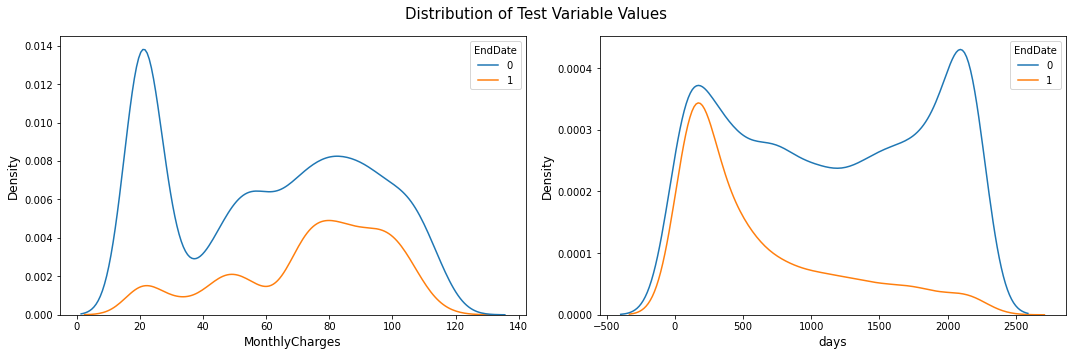

In [30]:
#Examine distributions for each feature.
test_vars = ['MonthlyCharges', 'days']
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle('Distribution of Test Variable Values', fontsize=15)

for col, ax in zip(test_vars, axs):
    sns.kdeplot(x=col, hue='EndDate', data=df, ax=ax)
    ax.set_ylabel('Density', fontsize=12)
    ax.set_xlabel(col, fontsize=12)
plt.tight_layout()
plt.show()

3.4 Notes: From these kernel density estimator plots, we can see that our data is not normally distributed. While ttests assume normal distribution, it is quite robust to non-normally distributed data when the sample size is large (e.g. greater than 50). Since our sample size for both target values is above one-thousand observations, we do not need to normalize our data in order to run a two-sample independent t-test.

In [31]:
#Create datasets for chruned and not-churned groups.
churned = df.loc[df['EndDate'] == 1]
not_churned = df.loc[df['EndDate'] == 0]

In [32]:
#Create function to run t-test.
def ttest(df1, df2, alpha, name):
    results = st.ttest_ind(df1, df2)
    print(f'P-value of {name} t-test: {results.pvalue}')
    if (results.pvalue < alpha):
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")

In [33]:
#Run Contracts Length Ttest.
ttest(not_churned.days, churned.days, .01, 'Contracts Length')

P-value of Contracts Length t-test: 1.5877601609064865e-158
We reject the null hypothesis


In [34]:
#Run Monthly Charges Ttest.
ttest(not_churned.MonthlyCharges, churned.MonthlyCharges, .01, 'Monthly Chargest')

P-value of Monthly Chargest t-test: 2.706645606888261e-60
We reject the null hypothesis


3.4 Notes Continued: In this subsection, we tested two hypotheses regarding the difference in mean monthly charge and contract length values between users who have churned and users who haven't. We set out alpha level to .01, rather than .05, in order to significantly reduce the chance of type 1 errors. In carrying out our tests, we found that both of our null hypotheses can be rejected; in other words, the difference in observed mean monthly charge and contract length values between the two groups is statistically significant. As such, there is reasonable support for the assumption that those users who churn tend to have shorter contract lengths and higher monthly charges than users who don't churn.

### Exploratory Data Analysis Summary

In this section, we explored various aspects of our data. To begin, we examined the distribution of target values in our DataFrame; we found that there are more than twice as many negative observations as positive, which indicates that our dataset is mildly imbalanced. In order to ensure that our later model is properly trained, we will account for this imbalance by tuning the relevant hyperparameter(s); if we find that this method does not work, we will use a combination of SMOTEing and up/downsampling to balance our dataset.

Next we examined the correlations between all variables in our dataset. While we did find multicollinearity between certain features, we did not find that any features were highly correlated with our target feature. Additionally, we decided not to drop any features based simply on multicollinearity as the computational burden resulting from keeping these features, given the shape of our DataFrame, should not be significant.

Finally, we examined the dispersion of data for the continuous variables using boxplots; we set the 'hue' parameter to 'EndDate' in order to visualize the differences between target groups. From the boxplots we found that the mean and median contract length for individuals who have churned is much lower than the mean and median length for individuals who haven't. We also found that those who have churned have higher median and mean monthly charges than those who haven't churned. In order to determine whether the differences in mean values between the groups are significant, we perform two-sample independent t-tests with an alpha level of .01. As a result of our t-tests, we reject both of our null hypotheses: 1) that there is no difference in mean contract lengths for users who have churned versus users who haven't; and, 2) that there is no difference in mean monthly charge amount for users who have churned versus users who haven't.

In the following section, we will build and evaluate various models. In doing so, we will find the optimal hyperparameters for various gradient-boosting base models. We will then try blending and stacking techniques using logistic regression as our meta-estimators. The goal of these techniques is to obtain a better AUC-ROC score than any individual base-model with an ensemble model.

## Model Development

### Split Dataset

In [35]:
#Create feature and target sets.
y = df['EndDate']
X = df.drop('EndDate', axis=1)

#Create training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

### Create Scoring Function for Models

In [36]:
def score(y_true, proba, pred, name):
    """
    This function calculates various scores for a given model.
    The scores include:
    
    F1-Score
    Matthew's Correlation Coefficient
    AUC-ROC Score
    
    In addition to printing the scores, this function also creates a heatmap of the prediction confusion matrix.
    """
    
    #Calculate scores.
    f1 = f1_score(y_true, pred)
    matt = matthews_corrcoef(y_true, pred)
    auc = ros(y_true, proba)
    cf_matrix = confusion_matrix(y_true, pred)
    
    score_df = pd.DataFrame([[f1, auc, matt]], columns=['F1 Score', 'AUC_ROC Score', "Mathew's Corr."], index=[name])
    display(score_df)
    
    #Print confusion matrix with percentages.
    fig = plt.figure(figsize=(8, 5))
    plt.suptitle('Meta-Model Confusion Matrix', fontsize=15, y=.93)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.show()

### Find Optimal Hyperparameters for Base Models with Bayesian Optimization

#### Create Helper Function

In [37]:
#Create helper function.
def tune_model(objective, trials):
    """This function tunes hyperparameters. 
    When creating a study, optina will try to maximize the returned value, which will be AUC-ROC score.
    Once the specified number of trials is complete, it will return the best model score and associated hyperparameters."""
    
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=trials)
    best_params = study.best_params
    best_score = study.best_value
    print(f'Best roc-auc score: {best_score}')
    print(f'\nBest parameters: {best_params}')
    return best_params

#### XGBClassifier Optimization

In [38]:
%%skip True #Skip cell since previously run.

#Define an objective function to be maximized for XGBClassifier.
def objective_xgb(trial):
    
    """
    This function, along with the next two, contain the objective, which is to maximize AUC-ROC score.
    Here we search a range of hyperparameters and values to find the ones that provide the highest scores in the specified number of trials.
    We perform cross-validation in order to obtain more accurate scores for each trial.
    """
    
    #Set up parameters.
    splits = 5
    kf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=5)
    
    #Create array of zeros for storing out-of-fold predictions.
    oof_preds = np.zeros(X_train.shape[0])
    mean_auc = 0
    
    #Define parameter space.
    param_space = {
        'max_depth': trial.suggest_int("max_depth", 1, 10, 1),
        'gamma': trial.suggest_float('gamma', 0,1),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0,50),
        'reg_lambda' : trial.suggest_float('reg_lambda', 10,100),
        'colsample_bytree' : trial.suggest_float('colsample_bytree', 0,1),
        'min_child_weight' : trial.suggest_float('min_child_weight', 0, 5),
        'learning_rate': trial.suggest_float('learning_rate', 0, .15),
        'tree_method':'gpu_hist', 
        'gpu_id': 0,
        'random_state': 5,
        'n_estimators' : 10000,
        'max_bin' : trial.suggest_int('max_bin', 200, 550, 1),
        'objective': 'binary:logistic',
        'use_label_encoder':False,
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 5)
    }
    
    #Generate folds, train model, and make predictions for each fold.
    for num, (train_indx, valid_indx) in tqdm(enumerate(kf.split(X_train, y_train))):
        X_t, X_v = X_train.iloc[train_indx], X_train.iloc[valid_indx]
        y_t, y_v = y_train.iloc[train_indx], y_train.iloc[valid_indx]
        
        model = xgb.XGBClassifier(**param_space)
        model.fit(X_t, y_t.values.ravel(),
                 verbose=False,
                 eval_set=[(X_v, y_v.values.ravel())],
                 eval_metric='auc',
                 early_stopping_rounds=300)
        
        #Obtain out of fold predictions from validation set.
        #This is used for hyperparameter optimization.
        oof_preds[valid_indx] = model.predict_proba(X_v)[:, 1]
        
        #Obtain score for model fold.
        fold_auc = ros(y_v, oof_preds[valid_indx])
        
        #Mean score for all folds.
        mean_auc += fold_auc / splits
        
    print(f"\nOverall ROC AUC: {mean_auc}")
    return mean_auc

#Run trials
xgb_optuna = tune_model(objective_xgb, 100)

#### CatBoostClassifier Optimization

In [39]:
%%skip True #Skip cell since previously run.

#Define an objective function to be maximized for XGBClassifier.
def objective_cat(trial):
    
    #Set up parameters.
    splits = 5
    kf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=5)
    
    #Create array of zeros for storing out-of-fold predictions.
    oof_preds = np.zeros(X_train.shape[0])
    mean_auc = 0
    
    #Define parameter space.
    param_space = {
        'max_depth': trial.suggest_int("max_depth", 1, 10, 1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 10,100),
        'learning_rate': trial.suggest_float('learning_rate', 0, .15),
        'n_estimators': 10000,
        'task_type':'GPU', 
        'devices': '0:1',
        'random_state': 5,
        'max_bin' : trial.suggest_int('max_bin', 200, 550, 1),
        'subsample' : trial.suggest_float('subsample', 0, 1),
        'eval_metric': 'AUC',
        'bootstrap_type':'Poisson',
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 5)
    }
    
    #Generate folds, train model, and make predictions for each fold.
    for num, (train_indx, valid_indx) in tqdm(enumerate(kf.split(X_train, y_train))):
        X_t, X_v = X.loc[train_indx], X.loc[valid_indx]
        y_t, y_v = y.loc[train_indx], y.loc[valid_indx]
        
        eval_dataset = Pool(X_v, y_v)
        
        model = CatBoostClassifier(**param_space)
        model.fit(X_t, y_t,
                 verbose=False,
                 eval_set=eval_dataset,
                 early_stopping_rounds=300)
        
        #Obtain out of fold predictions from validation set.
        #This is used for hyperparameter optimization.
        oof_preds[valid_indx] = model.predict_proba(X_v)[:, 1]
        
        #Obtain score for model fold.
        fold_auc = ros(y_v, oof_preds[valid_indx])
        
        #Mean score for all folds.
        mean_auc += fold_auc / splits
        
    print(f"\nOverall ROC AUC: {mean_auc}")
    
    return mean_auc

#Run trials
cat_optuna = tune_model(objective_cat, 100)

#### LGBMClassifier Optimization

In [40]:
%%skip True #Skip cell since previously run.

#Define an objective function to be maximized for XGBClassifier.
def objective_lbgm(trial):
    
    #Set up parameters.
    splits = 5
    kf = StratifiedKFold(n_splits=splits, shuffle=False, random_state=5)
    
    #Create array of zeros for storing out-of-fold predictions.
    oof_preds = np.zeros(X.shape[0])
    mean_auc = 0
    
    #Define parameter space.
    lgbm_params = {  "objective": trial.suggest_categorical("objective", ['binary']),
                     "boosting_type": trial.suggest_categorical("boosting_type", ['gbdt']),
                     "num_leaves": trial.suggest_int("num_leaves", 2, 256),
                     "max_depth": trial.suggest_int("max_depth", 1, 5),
                     "learning_rate": trial.suggest_float("learning_rate", 0.1, 1, step=0.01),
                     "n_estimators": 15000,        
                     "reg_alpha": trial.suggest_float("reg_alpha", 0.1, 100.0, step=0.1),
                     "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 100.0, step=0.1),
                     "random_state": 5,
                     "subsample": trial.suggest_float("subsample", 0.6, 1, step=0.01),
                     "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1, step=0.01),
                     'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
                     'min_child_weight': trial.suggest_categorical('min_child_weight', [256]),
                     'max_bin' : trial.suggest_int('max_bin', 50, 250),
                     'scale_pos_weight' : trial.suggest_int('scale_pos_weight', 1, 5, 1)
}
    
    #Generate folds, train model, and make predictions for each fold.
    for num, (train_indx, valid_indx) in tqdm(enumerate(kf.split(X_train, y_train))):
        X_t, X_v = X_train.iloc[train_indx], X_train.iloc[valid_indx]
        y_t, y_v = y_train.iloc[train_indx], y_train.iloc[valid_indx]
        
        model = lgbm.LGBMClassifier(**lgbm_params)
        model.fit(X_t, y_t.values.ravel(),
                 verbose=False,
                 eval_set=[(X_v, y_v.values.ravel())],
                 eval_metric='auc',
                 early_stopping_rounds=300)
        
        #Obtain out of fold predictions from validation set.
        #This is used for hyperparameter optimization.
        oof_preds[valid_indx] = model.predict_proba(X_v)[:, 1]
        
        #Obtain score for model fold.
        fold_auc = ros(y_v, oof_preds[valid_indx])
        
        #Mean score for all folds.
        mean_auc += fold_auc / splits
        
    print(f"\nOverall ROC AUC: {mean_auc}")
    
    return mean_auc

#Run trials
lgbm_optuna = tune_model(objective_lbgm, 300)

#### Obtain Scores for Base Models

4.3.5 Notes: In the previous subsections we used optuna to identify the optimal hyperparameters for various gradient-boosting algorithms. In this subsection, we will use these hyperparameters to train and test each of these models.

In [41]:
#Create hyperparameter dictionaries for models.
xgb_params = {'max_depth': 2, 
             'gamma': 0.0004954460923487494, 
             'reg_alpha': 1.0174751863783722, 
             'reg_lambda': 60.246409026789394, 
             'colsample_bytree': 0.8179973664461931, 
             'min_child_weight': 2.2244078153736115, 
             'learning_rate': 0.12715460243277876, 
             'max_bin': 520, 
             'scale_pos_weight': 3.9870145825539733,
             'tree_method':'gpu_hist', 
             'gpu_id': 0,
             'random_state': 5,
             'n_estimators' : 10000,
             'objective': 'binary:logistic',
             'use_label_encoder':False,
             'verbosity': 0}

cat_params = {'max_depth': 4, 
              'reg_lambda': 43.98307100437114, 
              'learning_rate': 0.13713609324602802, 
              'max_bin': 346, 
              'subsample': 0.5341001774632357, 
              'scale_pos_weight': 1.0325655806558183,
              'n_estimators': 10000,
              'task_type':'GPU', 
              'devices': '0:1',
              'random_state': 5,
              'eval_metric': 'AUC',
              'bootstrap_type':'Poisson',
              'verbose': False}

lgbm_params = {'objective': 'binary', 
               'boosting_type': 'gbdt', 
               'num_leaves': 158, 
               'max_depth': 5, 
               'learning_rate': 0.59, 
               'reg_alpha': 4.5, 
               'reg_lambda': 20.6, 
               'subsample': 0.79, 
               'colsample_bytree': 0.9600000000000001, 
               'min_child_samples': 42, 
               'min_child_weight': 256, 
               'max_bin': 237,
               'scale_pos_weight': 5,
               'n_estimators': 15000,
               'random_state' : 5}

#Create list of models.
models = [('XGBoost', xgb.XGBClassifier(**xgb_params)),
          ('CatBoost', CatBoostClassifier(**cat_params)),
          ('LGB', lgbm.LGBMClassifier(**lgbm_params))]

---------------XGBoost Model Scores---------------


,F1 Score,AUC_ROC Score,Mathew's Corr.
XGBoost,0.829615,0.959434,0.764733


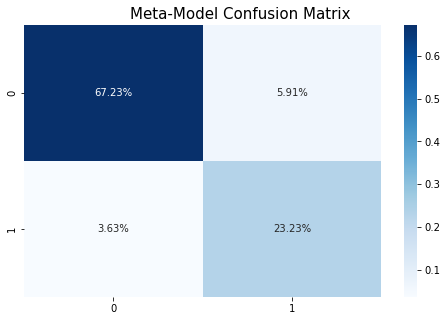



---------------CatBoost Model Scores---------------


,F1 Score,AUC_ROC Score,Mathew's Corr.
CatBoost,0.834091,0.96035,0.783153


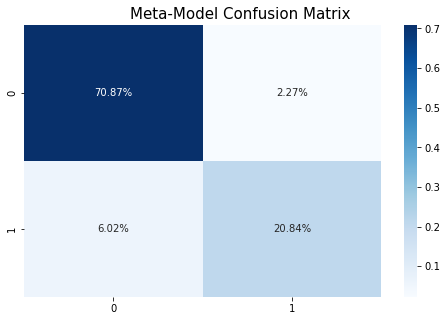



---------------LGB Model Scores---------------


,F1 Score,AUC_ROC Score,Mathew's Corr.
LGB,0.678275,0.902454,0.551315


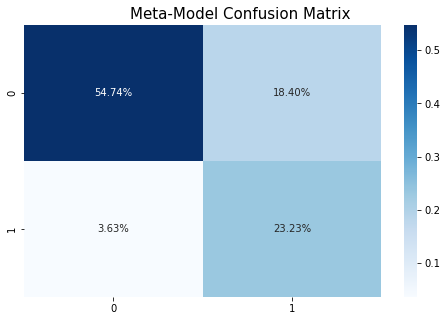

In [42]:
#Obtain scores for all base models.
for name, model in models:        
    #Train model.
    model = model
    model.fit(X_train, y_train)
    
    #Obtain predictions on test set.
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]
    
    print("-" * 15 + f"{name} Model Scores" + "-" * 15)
    score(y_test, pred_proba, pred, name)
    print()
    print()

4.3.5 Notes Continued: In this subsection we obtained various scores for our base models on the testing dataset. For information purposes, we will quickly describe what each score is meant to reflect.

* F1 Score: This represents the harmonic mean of a model's precision and recall scores. It takes into account a model's true positive rate, false positive rate, and false negative rate. The F1 score can range anywhere between 1 and 0, where 1 indicates perfect precision (i.e., true positives / predited positives) and recall (i.e., true positives / actial positives), and 0 indicates that either precision or recall is 0. 


* AUC-ROC: This represents the area under the receiver operating characteristic curve, which is a graph that shows the performance of a classification model at all thresholds. The curve plots true positive rate versus false positive rate. Ideally, we would like a model's AUC-ROC score to be as close to 1 as possible.


* Matthew's Correlation Coefficient (MCC): This coefficient takes into account one extra parameter than F1 - that is, the true negative rate. In essence, a high MCC score is only obtained if a model's predection obtains good results in all four confusion matrix categories (i.e., true and false positive and negative rates). An MCC score can range between -1 and 1, where a value of 1 indicates perfect prediction, 0 indicates random prediction, and -1 indicates inverse prediction. 

Given the goal of this project, we would ideally like our model to have a high true positive rate and low false negative rate. Of the above models, the XGBoost model provides the best results in that regard. Although it's AUC-ROC, F1, and MCC scores are slightly lower than those of the CatBoost model, it has a higher true positive rate and lower false negative rate. That being said, if we are to judge each model solely according the the AUC-ROC score, then the CatBoost model is currently the best performing. Assuming that Telecom is primarily concerned with finding a model that provides the higest AUC-ROC score, we will consider the CatBoost model to be the best performing model so far.

It should be noted that, even though our classes are slightly imbalanced, hyperparameter optimization appears to have helped us train the model in such a way that accomodates this imbalance. In the following sections, we will attempt to obtain an even higher AUC-ROC score than the CatBoost model's score through stacking and blending. If these techniques do not provide better results, then we will recommend that Telecom deploy the CatBoost model - that is, if they are only concerned with the AUC-ROC score. If they would like a similarly performing model, in terms of AUC-ROC, though more balanced, then we would recomend the XGBoost model.

### Model Blending

A blended model is an ensemble of models in which the meta-model is trained on predictions made by the base models on a holdout dataset (e.g., the validation dataset). In this section, we will use the optimal hyperparameters idenfitied for our base models in the previous subsection to generate predictions from each model on the validation dataset. We will then feed those predictions to our meta-estimator (logistic regression) and obtain that model's AUC-ROC score. Finally, we will test our meta-model using the test set.

#### Create Function for Model Fitting

In [43]:
def fit_models(models, X_train, X_valid, y_train, y_valid):

    """
    This function serves to fit base-models on the training dataset and obtain predictions on the validation dataset.
    These predictions are used to train a meta-estimator, which is logistic regression in this case. 
    The trained meta-estimator is then returned.
    """
    
    #Create variable in which to store predictions for meta-model.
    preds_for_meta = []
    
    #Loop through models in model list.
    for name, model in models:
        
        #Fit model and obtain predictions.
        model.fit(X_train, y_train)
        pred = model.predict_proba(X_valid)[:, 1]
        
        #Obtain base model roc score.
        roc_base = ros(y_valid, pred)
        
        print(f'{name} score: {roc_base}')
        
        #Reshape prediction into single-column matrix.
        pred = pred.reshape(len(pred), 1)
        
        #Append prediction to varible for meta-model.
        preds_for_meta.append(pred)
        
    #Create 2D array from predictions.
    meta_features = np.hstack(preds_for_meta)
    
    #Define blender for model.
    meta_model = LogisticRegression(max_iter=10000)
    
    #Fit meta model on predictions from base models.
    meta_model.fit(meta_features, y_valid)
    
    #Obtain predictions and print scores.
    preds_proba = meta_model.predict_proba(meta_features)[:, 1]
    preds = meta_model.predict(meta_features)
    
    score(y_valid, preds_proba, preds, 'meta_model_train')
    
    return meta_model

#### Create Function for Meta-Model Testing

In [44]:
def meta_predict(models, meta_model, X_test):
    
    """
    Using the previously returned meta-estimator, this function carries out the 'blending'.
    We first obtain predictions on the test set from the base models. These predictions are used as features for the meta-estimator.
    The trained meta-estimator then makes predictions based on the new features, and scores are displayed.
    """
    
    #Variable to store base models' test predictions.
    preds_for_meta = []
    
    #Loop through models to make predictions.
    for name, model in models:
        
        #Make predictions with base models.
        pred = model.predict_proba(X_test)[:, 1]
        
        #Reshape prediction.
        pred = pred.reshape(len(pred), 1)
        
        #Append predition to meta-model prediction list.
        preds_for_meta.append(pred)
        
    #Reshape all predictions into 2D array.
    meta_features = np.hstack(preds_for_meta)
    
    #Make prediction using meta-model.
    meta_preds_proba = meta_model.predict_proba(meta_features)[:, 1]
    meta_preds = meta_model.predict(meta_features)
    
    #Display scores for meta-model on test set.
    score(y_test, meta_preds_proba, meta_preds, 'meta_model_test')

#### Split Training Data into Train and Validation Sets

4.4.3 Notes: Model blending requres us to use predictions from a validation set, instead of out-of-fold training sets, as features for our meta-model. As such, we need to further split our training data into training and validation sets. This will only be relevant for the model blending section; for model stacking, we will ensure that we only have training and testing datasets, the former of which we will use cross-validation on to obtain out-of-fold predictions.

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=5)

#### Train Meta-Model

XGBoost score: 0.9572135764043278
CatBoost score: 0.9495094115903365
LGB score: 0.8509589447161702


,F1 Score,AUC_ROC Score,Mathew's Corr.
meta_model_train,0.828528,0.956914,0.773454


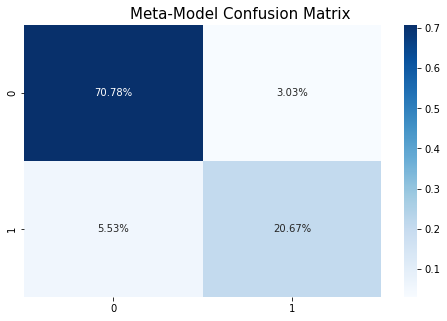

In [46]:
#Obtain meta_model.
meta_mod = fit_models(models, X_train, X_valid, y_train, y_valid)

#### Test Meta-Model

,F1 Score,AUC_ROC Score,Mathew's Corr.
meta_model_test,0.821192,0.956917,0.760771


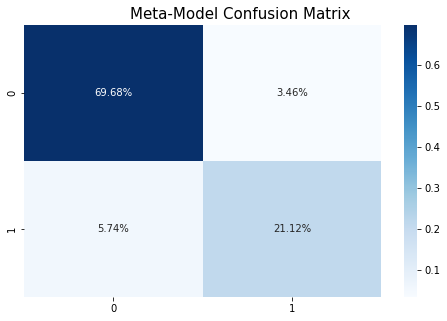

In [47]:
#Test meta-model
meta_predict(models, meta_mod, X_test)

#### Model Blending Summary

Based on the scores and confusion matrix in the previous subsection, it appears that our blended model produced a slighty lower scores on the testing dataset across than our CatBoost model; however, it is a significant improvement over the LGBM model. Our assumption was that by blending, the strengths of each model would combine to provide a higher score than any individual base model; however, it may be that our base models weren't sufficiently fine tuned in such a way that one model's inaccurate predictions were accurately predicted by another. 

In any case, the simple Catboost model remains the best performer. In the next section, we will use the stacking method with the same base- and meta-models to see if we can obtain a higher AUC-ROC score. 

### Model Stacking

Model stacking is an ensemble method by which a meta-model is trained on out-of-fold predictions made by base models during k-fold cross-validation. In this section, we will first train and test a stacked model using Sklearn's StackingClassifier. We will then train and test a hand-built model to see if we obtain similar results. Since we are using cross-validation and out-of-fold predictions to train our model, we no longer need a validation dataset. In order to train our models on the maximum number of observations, let us resplit our dataset into the original training and testing sets.

In [48]:
#Create training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

#### Stacking with Sklearn's StackingClassifier

,F1 Score,AUC_ROC Score,Mathew's Corr.
StackingClassifier,0.828508,0.962385,0.772029


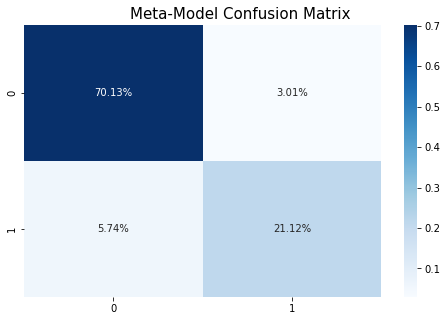

In [49]:
#Build a StackingClassifier.
clf = StackingClassifier(estimators=models, 
                             final_estimator=LogisticRegression(), 
                             cv=3)

clf.fit(X_train, y_train)
pred_proba = clf.predict_proba(X_test)[:, 1]
pred = clf.predict(X_test)

score(y_test, pred_proba, pred, 'StackingClassifier')

4.5.1 Notes: From the StackingClassifier scores, we can see that our stacked model actually performs better in terms of AUC-ROC score than the blended test model and our CatBoost model. Whereas the CatBoost model's AUC-ROC score was approximately .960, our stacked model's score is approximately .962. As things stand, the StackingClassifier is currently the best performing model.

In the following subsections, we will build and test our own StackingClassifier, using 10-fold cross-validation rather than the 3-fold cross-validation we used with the Sklearn StackingClassifier.

#### Create Function to Obtain Out-of-Fold Predictions

In [50]:
def obtain_preds(model, name, params, X_train, y_train, X_test, splits=10):
    
    """
    This function obtains out-of-fold predictions using 10-fold cross-validation.
    Each fold's predictions are stored in an array, which will then be used as one feature to train the meta-estimator.
    Each model is also trained on the full training dataset; the trained model's predictions on the test set will be used as features to test the meta-estimator.\
    """
    
    #Turn training and testing data into numpy arrays.
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = y_train.to_numpy()
    
    #Create folds object and lists to store predictions.
    kf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=5)
    oof_preds = np.zeros(X_train.shape[0])
    test_predictions = []
    mean_auc = 0
    
    #Iterate through each fold, making prediction on holdout set.
    for num, (train_indx, valid_indx) in tqdm(enumerate(kf.split(X_train, y_train))):
        X_t, X_v = X_train[train_indx], X_train[valid_indx]
        y_t, y_v = y_train[train_indx], y_train[valid_indx]
        
        #Fit model.
        estimator = model(**params)
        estimator.fit(X_t, y_t)
        
        #Obtain out of fold predictions from validation set.
        oof_preds[valid_indx] = estimator.predict_proba(X_v)[:, 1]
        
        #Obtain score for model fold.
        fold_auc = ros(y_v, oof_preds[valid_indx])
        
        #Mean score for all folds.
        mean_auc += fold_auc / splits
    
    print(f'Training AUC: {mean_auc}')
    
    #Train on full dataset.
    estimator_full = model(**params)
    estimator_full.fit(X_train, y_train)
    test_predictions = estimator_full.predict_proba(X_test)[:, 1]
    
    return oof_preds, test_predictions

#### Create Prediction DataFrames

In [51]:
stacking_features_train = pd.DataFrame()
stacking_features_test = pd.DataFrame()

#### Obtain Predictions for Base Models

**XGBClassifier**

In [52]:
#Obtain predictions for XGBClassifier
train_preds, test_preds = obtain_preds(xgb.XGBClassifier, 'XGBClassifier', xgb_params, X_train, y_train, X_test)

#Add predictions to dataframes.
stacking_features_train['xgb_preds'] = train_preds
stacking_features_test['xgb_preds'] = test_preds

10it [01:10,  7.00s/it]


Training AUC: 0.9544684135439225


**CatBoostClassifier**

In [53]:
#Obtain predictions for CatBoostClassifier.
train_preds, test_preds = obtain_preds(CatBoostClassifier, 'CatBoostClassifier', cat_params, X_train, y_train, X_test)

#Add predictions to DataFrames.
stacking_features_train['cat_preds'] = train_preds
stacking_features_test['cat_preds'] = test_preds

10it [23:38, 141.83s/it]


Training AUC: 0.9515938804169797


**LGBMClassifier**

In [54]:
#Obtain predictions for CatBoostClassifier.
train_preds, test_preds = obtain_preds(lgbm.LGBMClassifier, 'LGBMClassifier', lgbm_params, X_train, y_train, X_test)

#Add predictions to DataFrames.
stacking_features_train['lgbm_preds'] = train_preds
stacking_features_test['lgbm_preds'] = test_preds

10it [00:28,  2.80s/it]


Training AUC: 0.8866318161723163


#### Train and Test Stacking Meta-Model

In [55]:
def test_meta_Stack(X_train, y_train, X_test, y_test):
    
    """
    This function is used to train and test a meta-estimator - in this case, we use logistic regression.
    We train the meta-estimator on the features derived from out-of-fold predictions.
    The estimator makes predictions using the previously defined testing features.
    Finally, scores for the Stacked Meta-Model are displayed.
    """
    
    meta_estt = LogisticRegression(max_iter=10000)
    meta_estt.fit(X_train, y_train)
    
    #Obtain validation predictions and add to list.
    training_preds = meta_estt.predict_proba(X_train)[:, 1]
    train_score = ros(y_train, training_preds)
    print(f'AUC-ROC score for training estimator : {train_score}')
    
    #Obtain predictions on test set and add to list.
    test_predictions_proba = meta_estt.predict_proba(X_test)[:, 1]
    test_predictions = meta_estt.predict(X_test)

    #Obtain scores and confusion matrix.
    score(y_test, test_predictions_proba, test_predictions, 'Stacked Meta-Model')

AUC-ROC score for training estimator : 0.9559709972025063


,F1 Score,AUC_ROC Score,Mathew's Corr.
Stacked Meta-Model,0.832408,0.962782,0.776738


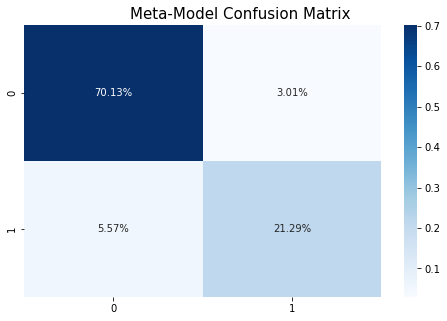

In [57]:
#Test stacking model.
test_meta_Stack(stacking_features_train, y_train, stacking_features_test, y_test)

4.5.5 Notes: At is turns out, our stacking method with 10-fold cross-validation provided an even higher AUC-ROC score than our previous stacked model, as well as higher than any of the individual base models used to develop our stacked model. That being said, it has a slightly lower F1 and MCC score than the CatBoost base model, meaning the latter is slighlty more balanced.

#### Model Stacking Summary

After testing both Sklearn's StackingClassifier (with 3-fold cross validation) and our custom-made stacked model (using 10-fold cross-validation), we found that both models performed better in terms of AUC-ROC score than any of the base models. Our StackingClassifier model had a higher AUC-ROC score than any of our base models, and our Stacked Meta-Model had an even higher score. Where our blended model failed to produce a higher AUC-ROC score than our CatBoost model, which was approximately .960, our Stacked Meta-Model's AUC-ROC score was approximately .963. 

Having trained and tested various models, it appears that our Stacked Meta-Model is the most well-balanced, highest AUC-ROC scoring model we developed. Given that our goal was to produce a model with an AUC-ROC score of at least .88, we are very pleased with the results of this project.

## Conclusion

The aim of this project was to build a machine learning model for Telecom that can predict whether a client is likely to churn. The specification for this model was that it have an AUC-ROC score of .88 or greater. Given that AUC-ROC scores alone do not provide an adequate overview of the quality of one's model, we also evaluated each model according to their F1 and Matthew's Correlation Coefficient scores. 

Prior to developing models, we carried out exploratory data analysis and preprocessing. In doing so, we found that there were numerous steps that were necessary to carry our prior to building models; for example, we had to deal with NaNs, categorize data, and change datatypes. Additionally, we decided to create some new features and drop some that don't provide much useful information.

Regarding our exploratory data analaysis, we started by examining the distribution of target variables. We found that the dataset is mildly imbalanced, with between 2 and 3 times the number of negative observations as positive. We chose not to attempt SMOTEing or up/downsample to correct for this imbalance unless our models aren't able to account for it, which we found they could. 

Through exploratory data analysis, we also found that no independent variables strongly correlate with our dependent variables, though there was a bit of multicollinearity between independent variables. Regarding the latter point, we decided to drop the 'month' feature from our dataset, as its correlation with all other features was exactly the same as the 'days' feature's.

As a final step in exploratory data analysis, we examined the dispersion of data for the continuous variables using boxplots; we set the 'hue' parameter to 'EndDate' in order to visualize the differences between target groups. In doing so, we found that the churn group appears to have a shorter mean contract length and a higher mean monthly cost than the group that didn't churn. In order to see if this is a valid conclusion, we statistically tested whether the difference in means between groups are significant. As a result of our tests, we rejected both of our null hypotheses: 1) that there is no difference in mean contract lengths for users who have churned versus users who haven't; and, 2) that there is no difference in mean monthly charge amount for users who have churned versus users who haven't.

As for the modeling portion of this project, we began by searching for the optimal hyperparameters for the three main gradient-boosting algorithms using optuna. Once we identified the best parameters out of a certain number of trials, we obtained the relevant scores for each base model. We then attempted ensemble blending, using logistic regression as our meta-estimator. Our assumption was that the blended model would produce higher scores than the base models; however, we found that, while the blended model performed better than the LGBM and XGBoost models, it performed slightly worse than our CatBoost model. 

We then attempted model stacking, first using Sklearn's built-in StackingClassifier with 3-fold cross-validation. We found that this stacked model performed better, in terms of AUC-ROC score, than any of the base models. We then built a stacking classifier by hand, using 10-fold cross-validation. We found that this meta-model actually performed even better than the StackingClassifier. 

After training and testing various models, our conclusion is that the Stacked Meta-Model performs the best of all models; in terms of AUC-ROC, the Stacked Meta-Model had the highest score (i.e., .963). The only weakness we observed with this model is that is produced slightly lower F1 and MCC scores than the CatBoost model; however, given the small difference between the scores, we may conclude that the Stacked Meta-Model is almost as balanced as out CatBoost model. If AUC-ROC score is Telecom's primary concern, then they should deploy the Stacked Meta-Model; however, if they would like to sacrafice some of the AUC-ROC score in order to obtain better balance between true and false positive and negative rates, then perhaps the CatBoost model would be a better choice.

Overall, we believe that we have produced a model that not only meets, but exceeds Telecom's specifications. Our only recommendation regarding producing a more robust model would be for Telecom to collect and supply more observations for us to use to develop models. For this task, we were supplied with 7043 observations. While the difference between individuals who churn and those who don't might be significant enough to build a robust model on such limited data, we would be interested in seeing if models would be even more robust when trained on more data.